Data Description:  The actual concrete compressive strength (MPa) for a given mixture under a  specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations). Domain:  Material manufacturing Context: Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate. 
 
Attribute Information: ● Cement    : measured in  kg in a m3 mixture ● Blast     : measured in  kg in a m3 mixture ● Fly ash     : measured in  kg in a m3 mixture ● Water     : measured in  kg in a m3 mixture ● Superplasticizer   : measured in  kg in a m3 mixture ● Coarse Aggregate   : measured in  kg in a m3 mixture ● Fine Aggregate   : measured in  kg in a m3 mixture ● Age     : day (1~365) ● Concrete compressive strength measured in MPa 
 
Learning Outcomes:  ● Exploratory Data Analysis ● Building ML models for regression ● Hyper parameter tuning 
 
Objective:  Modeling of strength of high performance concrete using Machine Learning Steps and tasks: 1. Deliverable -1  (Exploratory data quality report reflecting the following) a. Univariate analysis 
i. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails,  missing values, outliers b. Multivariate analysis  i. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes c. Strategies to address the different data challenges such as data pollution, outliers and missing values 2. Deliverable -2  (Feature Engineering techniques) a. Identify opportunities (if any) to create a composite feature, drop a feature b. Decide on complexity of the model, should it be simple linear mode in terms of parameters or would a quadratic or higher degree help c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength 3. Deliverable -3  (create the model ) a. Obtain feature importance for the individual features using multiple methods and present your findings 4. Deliverable -4 (Tuning the model) a. Algorithms that you think will be suitable for this project b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit c. Model performance range at 95% confidence level  References: ● Medium article on hyper parameter tuning 

# Importing the libraries:
numpy: for numerical analysis
pandas:for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
matplotlib:Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
seaborn:Another complimentary package that is based on this data visualization library is Seaborn, which provides a high-level interface to draw statistical graphics.
itertools:itertools. groupby (iterable[, key]) Make an iterator that returns consecutive keys and groups from the iterable. The key is a function computing a key value for each element. If not specified or is None , key defaults to an identity function and returns the element unchanged.

    

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

Set Display till 1000 column
Import data to Panda dataframe

In [2]:
pd.set_option('display.max_columns', 100)
dataframe = pd.read_csv("concrete.csv")

In [3]:
df = dataframe

In [4]:
df.head(5)
                

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [5]:
df.shape
print("Number of rows    :",df.shape[0])
print("Number of columns :",df.shape[1])

Number of rows    : 1030
Number of columns : 9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

3d Presentation of dataframe with Independent and Depenedent variable.

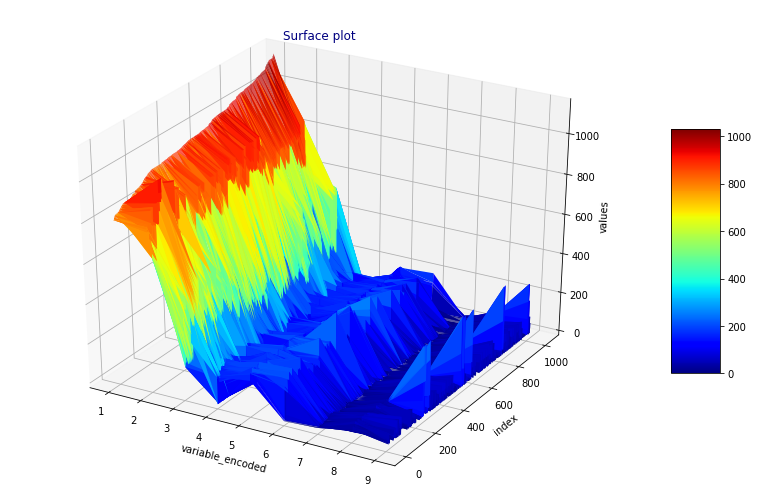

In [8]:
from mpl_toolkits.mplot3d import Axes3D
df1 = df.copy()

df1 = df1.sort_values(by=['coarseagg'],ascending=True).reset_index()

df1 = df1[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age', 'strength']] 

df = df1.unstack().reset_index()
df.columns = ["X","Y","Z"]


df["X"] = df["X"].map({'coarseagg':1, 'fineagg':2 ,'cement':3, 'slag':6, 'ash':4,'water':5, 'superplastic':7,'age':9, 'strength':8})
 
fig = plt.figure(figsize=(14,9))

ax  = fig.gca(projection = "3d")

surf = ax.plot_trisurf(df["X"],df["Y"],df["Z"],cmap="jet",linewidth=2)
lab  = fig.colorbar(surf,shrink=.5,aspect=5)
ax.set_xlabel("variable_encoded")
ax.set_ylabel("index")
ax.set_zlabel("values")

plt.title("Surface plot",color="navy")
plt.show()

# #Surface plot for variables
* X - Axis = columns encoded as [ coarseagg : 1, fineagg : 2 , cement : 3 , ash : 4 , water : 5 ,      slag:6,superplastic : 7 , strength : 8 , age : 9]
* Y - Axis = index.
* Z - Axis = values .

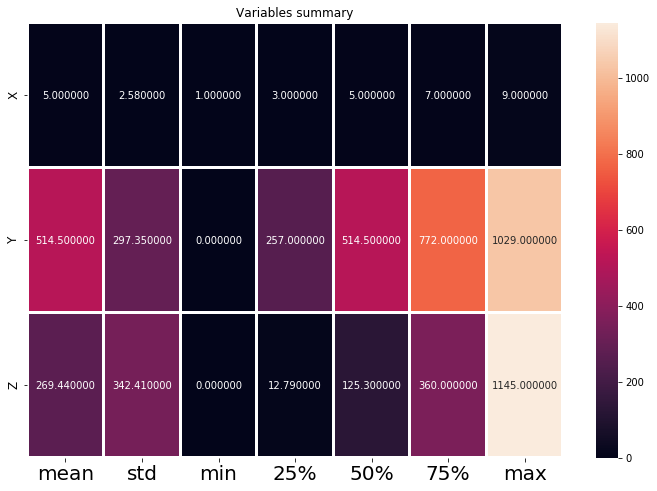

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

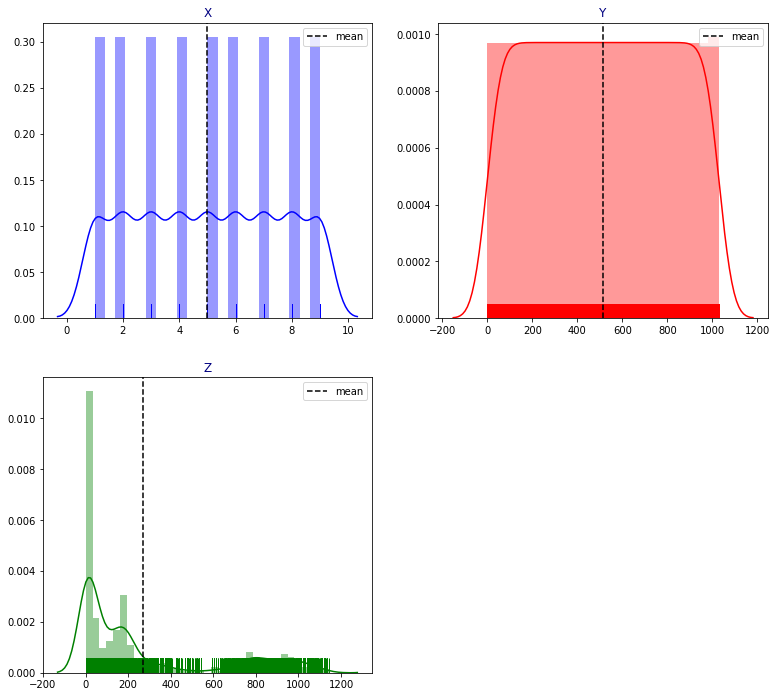

In [10]:
cols = [i for i in df.columns if i not in 'strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

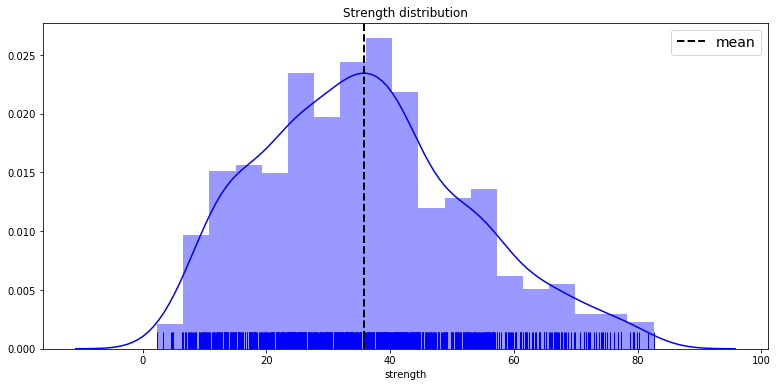

In [11]:
plt.figure(figsize=(13,6))
sns.distplot(df1["strength"],color="b",rug=True)
plt.axvline(df1["strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Strength distribution")
plt.show()

# Pair plot between variables

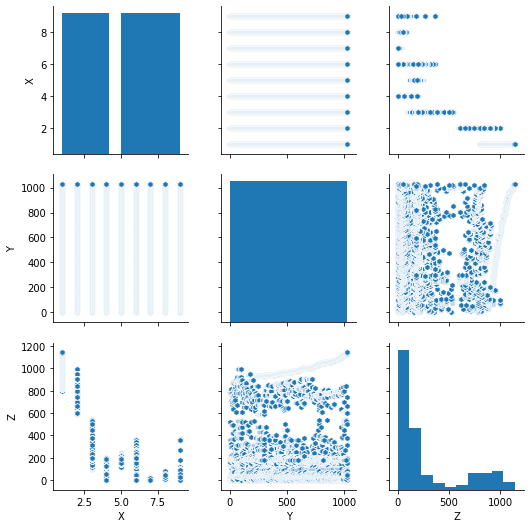

In [12]:
sns.pairplot(df,markers="h")
plt.show()

# Contour plot between ingredients and compressive strength

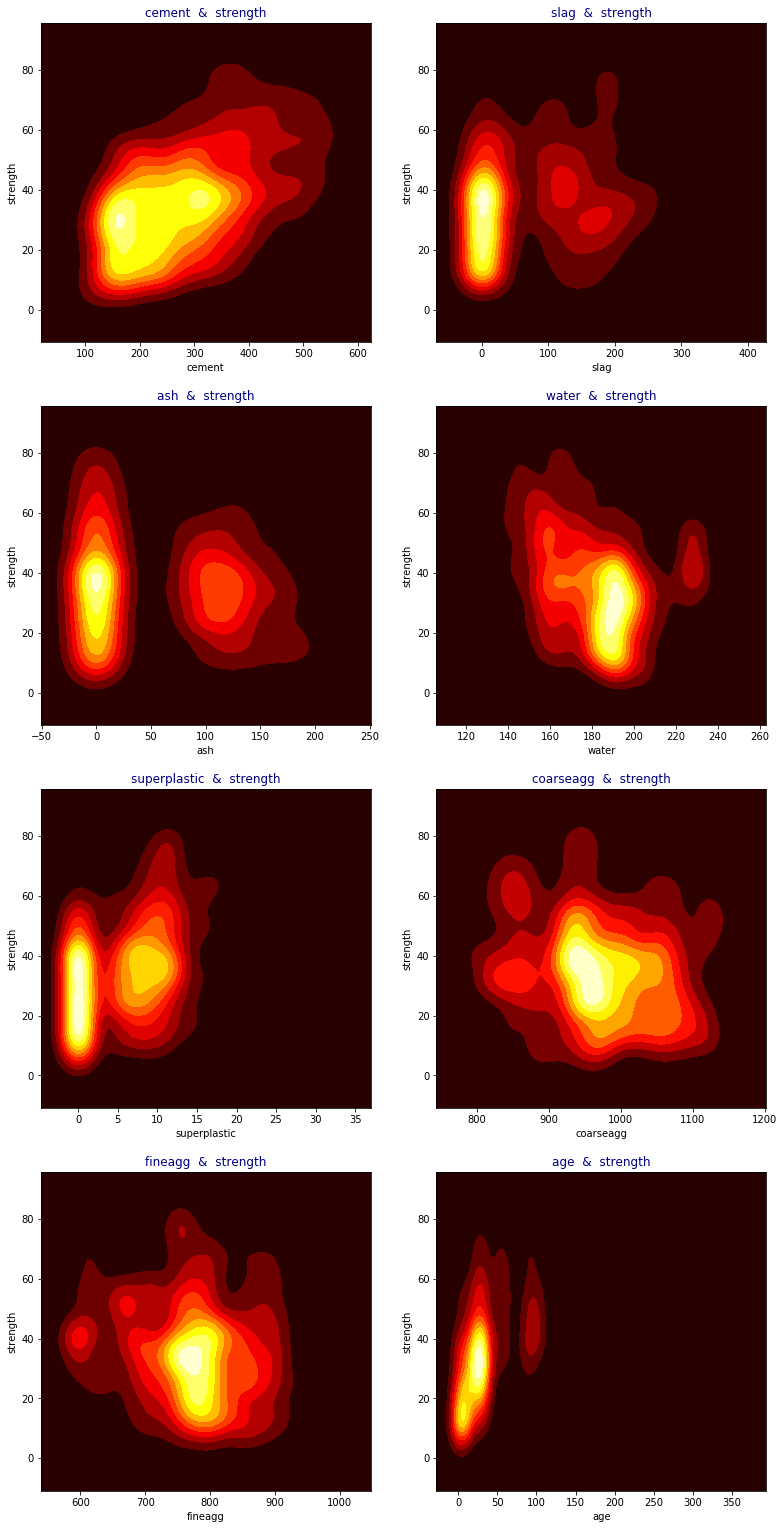

In [13]:
cols = [i for i in df1.columns if i not in 'strength']
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.kdeplot(df1[i],
                df1["strength"],
                cmap="hot",
                shade=True)
    plt.title(i+"  &  strength",color="navy")


# Correlation between variables

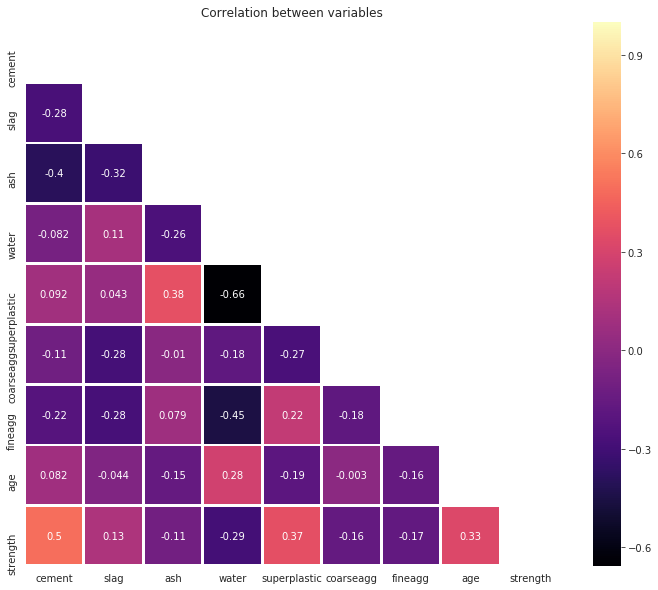

In [14]:
cor = df1.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))

with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,
                mask = mask,cmap="magma")
plt.title("Correlation between variables")
plt.show()

# Swarm plot for variables

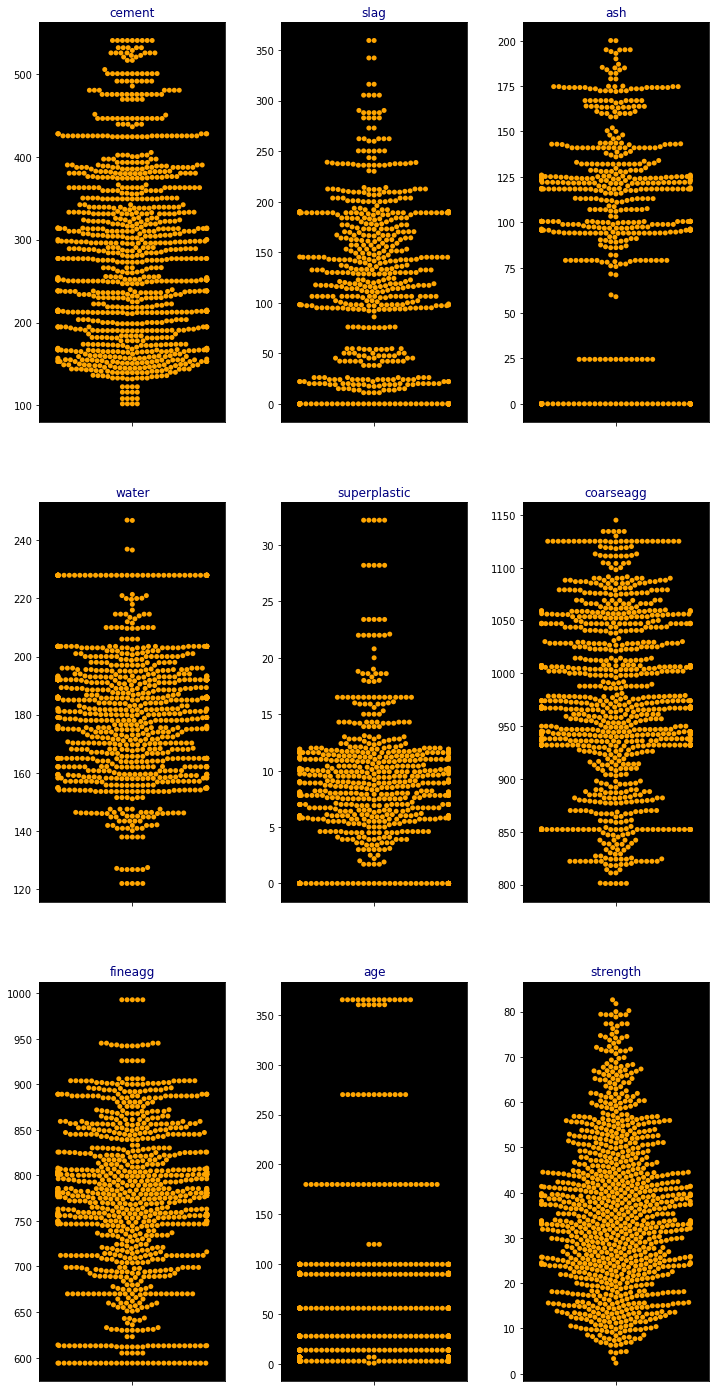

In [15]:
cols = ['cement', 'slag', 'ash', 'water', 'superplastic','coarseagg', 'fineagg', 'age', 'strength'] 



length = len(cols)

plt.figure(figsize=(12,25))

for i,j in itertools.zip_longest(cols,range(length)):
    
    plt.subplot(3,3,j+1)
    ax = sns.swarmplot( y = df1[i],color="orange")
    ax.set_facecolor("k")
    ax.set_ylabel("")
    ax.set_title(i,color="navy")
    plt.subplots_adjust(wspace = .3)

# 3D plot for cement ,compressive strength and super plasticizer
* X - Axis = cement.
* Y - Axis = compressive strength.
* Z - Axis = super plasticizer.
* Color    = Age

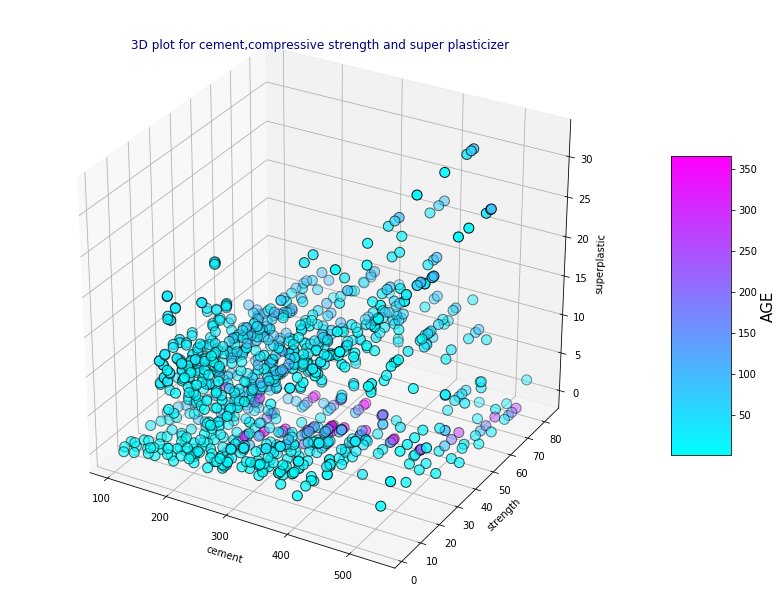

In [16]:


fig = plt.figure(figsize=(14,11))

ax  = fig.gca(projection = "3d")
#plt.subplot(111,projection = "3d") 

plot =  ax.scatter(df1["cement"],
           df1["strength"],
           df1["superplastic"],
           linewidth=1,edgecolor ="k",
           c=df1["age"],s=100,cmap="cool")

ax.set_xlabel("cement")
ax.set_ylabel("strength")
ax.set_zlabel("superplastic")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("AGE",fontsize = 15)

plt.title("3D plot for cement,compressive strength and super plasticizer",color="navy")
plt.show()

In [17]:
#Binning days to months
def label(df1):
    if df1["age"] <= 30:
        return "1 month"
    if df1["age"] > 30 and df1["age"] <= 60 :
        return "2 months"
    if df1["age"] > 60 and df1["age"] <= 90 :
        return "3 months"
    if df1["age"] > 90 and df1["age"] <= 120 :
        return "4 months"
    if df1["age"] > 120 and df1["age"] <= 150 :
        return "5 months"
    if df1["age"] > 150 and df1["age"] <= 180 :
        return "6 months"
    if df1["age"] > 180 and df1["age"] <= 210 :
        return "7 months"
    if df1["age"] > 210 and df1["age"] <= 240 :
        return "8 months"
    if df1["age"] > 240 and df1["age"] <= 270 :
        return "9 months"
    if df1["age"] > 270 and df1["age"] <= 300 :
        return "10 months"
    if df1["age"] > 300 and df1["age"] <= 330 :
        return "11 months"
    if df1["age"] > 330 :
        return "12 months"
df1["age_months"] = df1.apply(lambda df1:label(df1) , axis=1)

In [18]:
df1.head()

cement  slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   326.0   0.0  138.0  199.0          11.0      801.0    792.0   28   
1   516.0   0.0    0.0  162.0           8.2      801.0    802.0   28   
2   516.0   0.0    0.0  162.0           8.3      801.0    802.0   28   
3   356.0   0.0  142.0  193.0          11.0      801.0    778.0   28   
4   326.5   0.0  137.9  199.0          10.8      801.1    792.5   28   

   strength age_months  
0     40.68    1 month  
1     41.37    1 month  
2     41.37    1 month  
3     40.87    1 month  
4     38.63    1 month

# Age distribution in months

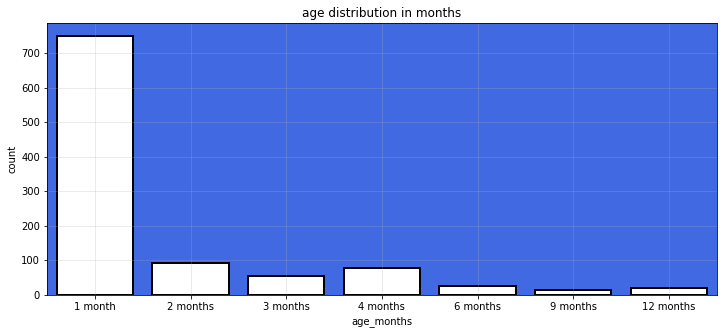

In [19]:
plt.figure(figsize=(12,5))
order = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
ax = sns.countplot(df1["age_months"],
                   order=order,linewidth=2,
                   edgecolor = "k"*len(order),
                   palette=["w"])
ax.set_facecolor("royalblue")
plt.title("age distribution in months")
plt.grid(True,alpha=.3)
plt.show()

# Compreesive strength by months

In [20]:
age_mon = df1.groupby("age_months")["strength"].describe().reset_index()

In [21]:
age_mon.iloc[1]

age_months    12 months
count                20
mean            42.6995
std             8.34924
min               25.08
25%              38.695
50%               42.03
75%              46.655
max               56.14
Name: 1, dtype: object

In [22]:
age_mon = df1.groupby("age_months")["strength"].describe().reset_index()

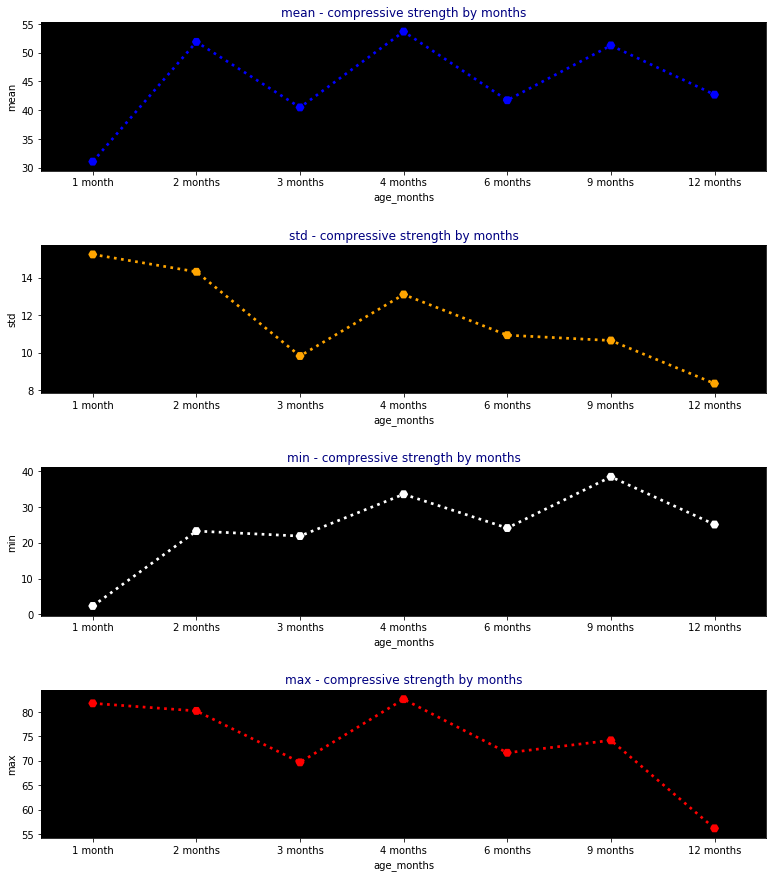

In [23]:


order  = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
cols   = [ 'mean', 'std' , 'min' , 'max']
length = len(cols)
cs     = ["b","orange","white","r"] 

fig = plt.figure(figsize=(13,15))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,1,j+1)
    ax = sns.pointplot("age_months",i,data=age_mon,order=order,markers="H",linestyles="dotted",color=k)
    plt.subplots_adjust(hspace=.5)
    ax.set_facecolor("k")
    plt.title(i+" - compressive strength by months",color="navy")

# parllell coordinates plot for 3 categories 
* Concrete's compressive strength requirements can vary from 2500 psi (17 MPa) for residential concrete to 4000psi (28 MPa) and higher in commercial structures. Higher strengths upto and exceeding 10,000 psi (70 MPa) are specified for certain applications.
* Binning compressive strength in 3 categories.
* category 1 - mpa  less than 17.
* category 2 - mpa in between 17 to 28.
* category 3 - mpa greater than 28.

In [24]:
data2.columns

NameError: name 'data2' is not defined

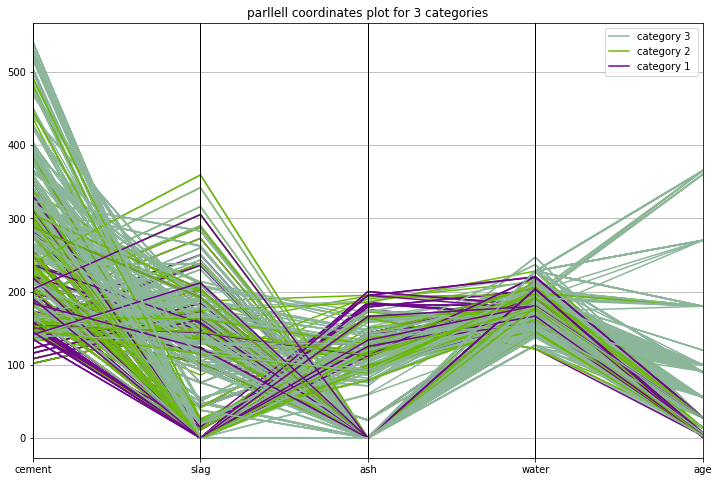

In [25]:
data2  =  dataframe.copy()

def lab(data2):
    if data2["strength"] <= 17:
        return "category 1"
    if data2["strength"] >17 and data2["strength"] <= 28 :
        return "category 2"
    if data2["strength"] >28 :
        return "category 3 "
    
data2["compressive_strength_category"] = data2.apply(lambda data2:lab(data2) ,axis =1)

from pandas.plotting import parallel_coordinates

cols1 = ['cement', 'slag','ash', 'water',"compressive_strength_category",'age']

plt.figure(figsize=(12,8))
parallel_coordinates(data2[cols1],"compressive_strength_category")
plt.title("parllell coordinates plot for 3 categories")
plt.show()

# scatter plot between cement and water
* X - axis = water.
* Y - axis = cement.
* SIZE and COLOR = compressive strength.

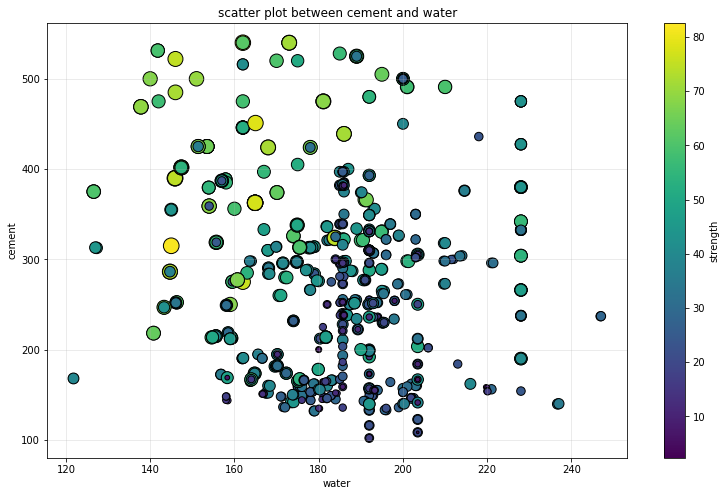

In [26]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(df1["water"],df1["cement"],
            c=df1["strength"],s=df1["strength"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("water")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("scatter plot between cement and water")
plt.grid(True,alpha=.3)
plt.show()

# scatter plot between fine_agg and coarse_agg.
* X - axis = fine_agg.
* Y - axis = coarse_agg.
* SIZE and COLOR = compressive strength.

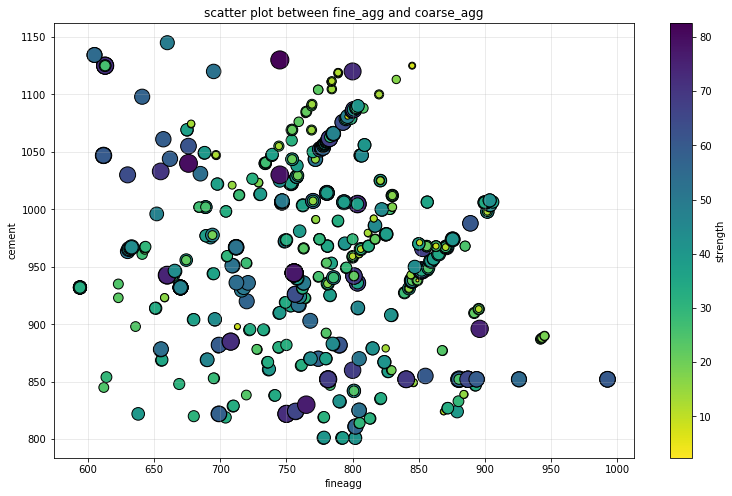

In [27]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(df1["fineagg"],df1["coarseagg"],
            c=df1["strength"],s=df1["strength"]*4,
            linewidth=1,edgecolor="k",cmap="viridis_r")
ax.set_facecolor("w")
ax.set_xlabel("fineagg")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("scatter plot between fine_agg and coarse_agg")
plt.grid(True,alpha=.3)
plt.show()

# Splitting train and test data

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
age_months      1030 non-null object
dtypes: float64(8), int64(1), object(1)
memory usage: 80.5+ KB


In [29]:
#Splitting train and test data
from sklearn.model_selection import train_test_split

train,test = train_test_split(dataframe,test_size =.3,random_state = 123)
train_X = train[[x for x in train.columns if x not in ["strength"] + ["age_months"]]]
train_Y = train["strength"]
test_X  = test[[x for x in test.columns if x not in ["strength"] + ["age_months"]]]
test_Y  = test["strength"]


# Model

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

target = "strength"
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type):
    
    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)
    prediction = algorithm.predict(dtestx)
    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(dtesty,prediction)) )
    print ("***************************************************************************")
    prediction = pd.DataFrame(prediction)
    cross_val = cross_val_score(algorithm,dtrainx,dtrainy,cv=20,scoring="neg_mean_squared_error")
    cross_val = cross_val.ravel()
    print ("CROSS VALIDATION SCORE")
    print ("************************")
    print ("cv-mean :",cross_val.mean())
    print ("cv-std  :",cross_val.std())
    print ("cv-max  :",cross_val.max())
    print ("cv-min  :",cross_val.min())
    
    plt.figure(figsize=(13,28))
    plt.subplot(211)
    
    testy = dtesty.reset_index()["strength"]
    
    ax = testy.plot(label="originals",figsize=(12,13),linewidth=2)
    ax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)
  #  plt.axhline(testy.mean(),color = "r",linestyle="dashed",label=("original_mean:",testy.mean()))
  #  plt.axhline(prediction[0].mean(),color="b",linestyle = "dashed",label=("prediction_mean:",prediction[0].mean()))
    plt.legend(loc="best")
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    ax.set_facecolor("k")
    
    plt.subplot(212)
    
    if of_type == "coef":
        coef = pd.DataFrame(algorithm.coef_.ravel())
        coef["feat"] = dtrainx.columns
        ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax1.set_facecolor("lightgrey")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')
    
    elif of_type == "feat":
        coef = pd.DataFrame(algorithm.feature_importances_)
        coef["feat"] = dtrainx.columns
        ax2 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')

import warnings
warnings.filterwarnings("ignore")


# Linear Regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.076741927128777
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -114.16803383252382
cv-std  : 28.61166057717402
cv-max  : -61.65504407969563
cv-min  : -168.58083340834648


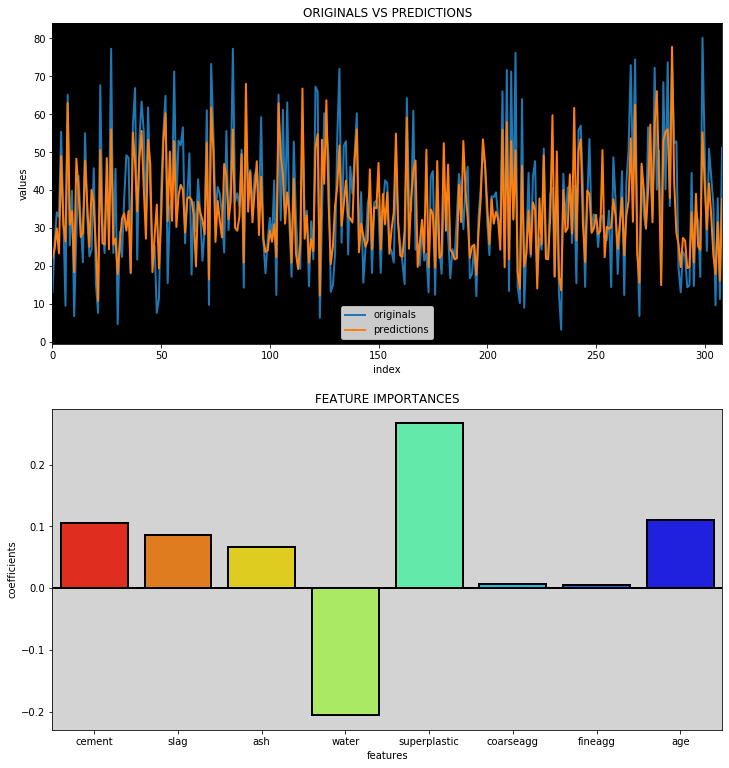

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,train_X,train_Y,test_X,test_Y, "coef")

# Lasso Regression

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.098703563233572
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -114.1280709627863
cv-std  : 28.406715972690694
cv-max  : -62.317893774059065
cv-min  : -170.21067452576474


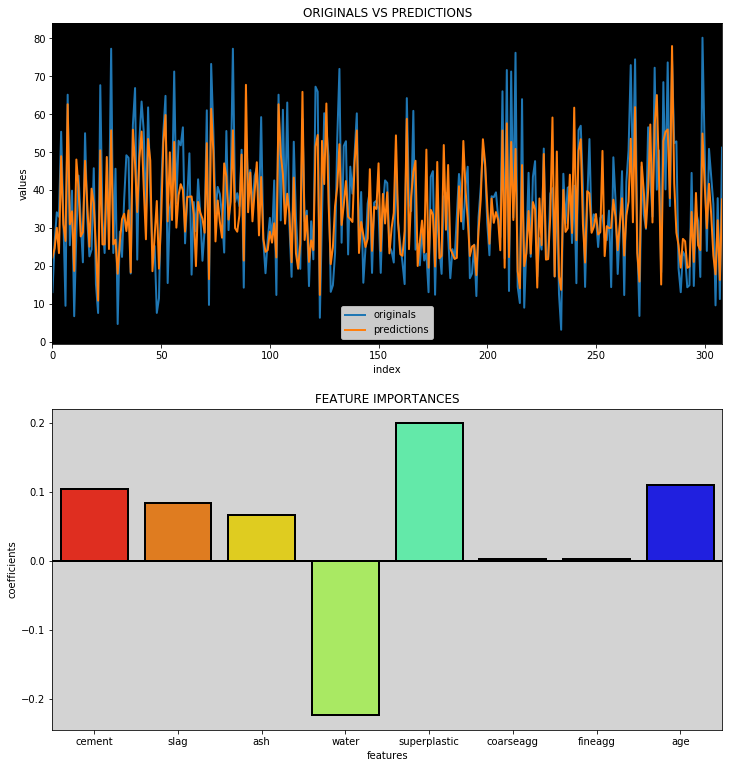

In [32]:
from sklearn.linear_model import Ridge,Lasso
ls = Lasso()
model(ls,train_X,train_Y,test_X,test_Y,"coef")

# Ridge Regression

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.076742460884812
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -114.16796146547881
cv-std  : 28.611506404155215
cv-max  : -61.655312436439125
cv-min  : -168.58145463313346


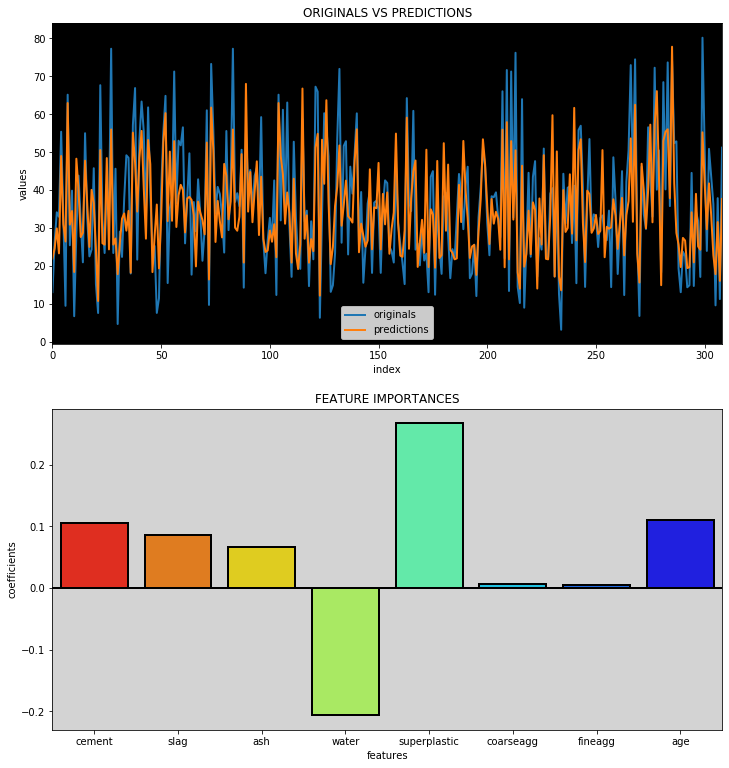

In [33]:
rigde = Ridge()
model(rigde,train_X,train_Y,test_X,test_Y,"coef")

# KNN Regressor

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
************************************************************************
ROOT MEAN SQUARED ERROR :  9.019473816267226
************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -91.49304839444444
cv-std  : 23.491661073494335
cv-max  : -42.468895
cv-min  : -123.01407077777776


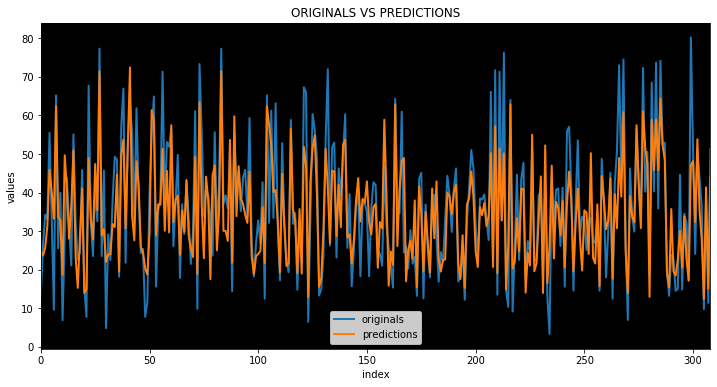

In [34]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(train_X,train_Y)

predictions = knn.predict(test_X)
predictions = pd.DataFrame(predictions)

test_y_new = test_Y.reset_index()
test_y_new = test_y_new["strength"]


ax3 = test_y_new.plot(label="originals",figsize=(12,6),linewidth=2)
ax3 = predictions[0].plot(label="predictions",figsize=(12,6),linewidth=2)
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")
ax3.set_facecolor("k")

print (knn)
print ("************************************************************************")
print ("ROOT MEAN SQUARED ERROR : ",np.sqrt(mean_squared_error(test_Y,predictions)))
cross_valid = cross_val_score(knn,train_X,train_Y,cv=20,scoring="neg_mean_squared_error")
cross_valid = cross_valid.ravel()
print ("************************************************************************")
print ("CROSS VALIDATION SCORE")
print ("************************")
print ("cv-mean :",cross_valid.mean())
print ("cv-std  :",cross_valid.std())
print ("cv-max  :",cross_valid.max())
print ("cv-min  :",cross_valid.min())

# Ada Boost Regressor

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)
***************************************************************************
ROOT MEAN SQUARED ERROR : 7.389364746259346
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -61.78166201681207
cv-std  : 14.98643032265191
cv-max  : -37.36559712895103
cv-min  : -92.13603774160164


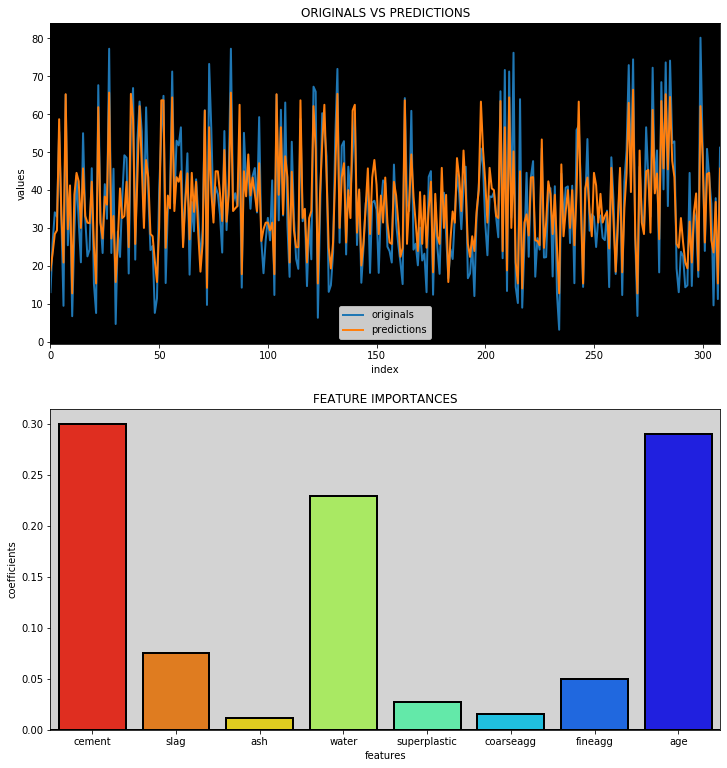

In [35]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
model(adb,train_X,train_Y,test_X,test_Y,"feat")

# ExtraTrees Regressor

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators='warn',
                    n_jobs=None, oob_score=False, random_state=None, verbose=0,
                    warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.187667036687215
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -29.13333862531594
cv-std  : 13.939398839465483
cv-max  : -9.211552527777778
cv-min  : -62.170281250000016


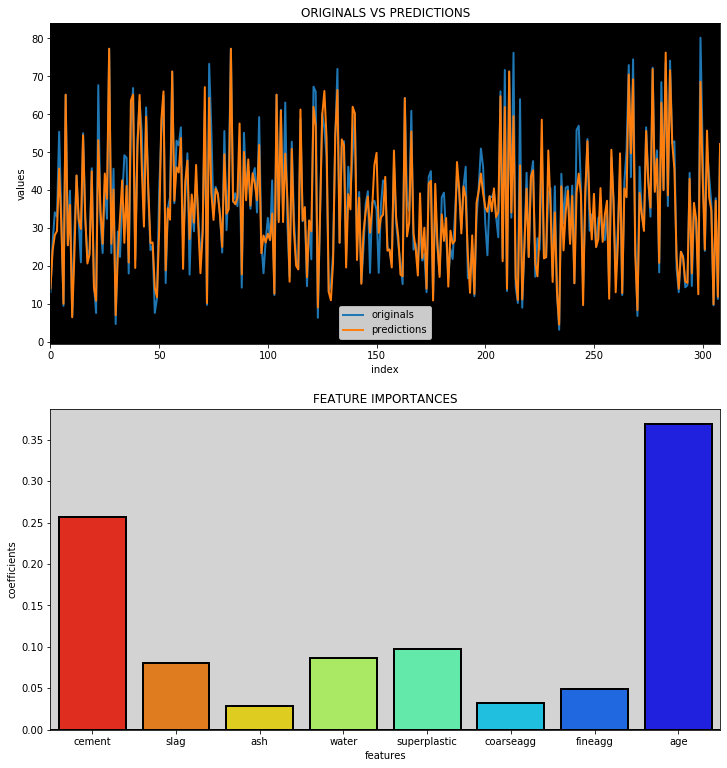

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
model(etr,train_X,train_Y,test_X,test_Y,"feat")

# Decision Tree Regressor

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
***************************************************************************
ROOT MEAN SQUARED ERROR : 6.7220166082473645
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -49.37423016798047
cv-std  : 19.83609694497425
cv-max  : -11.420216666666668
cv-min  : -88.70414583333333


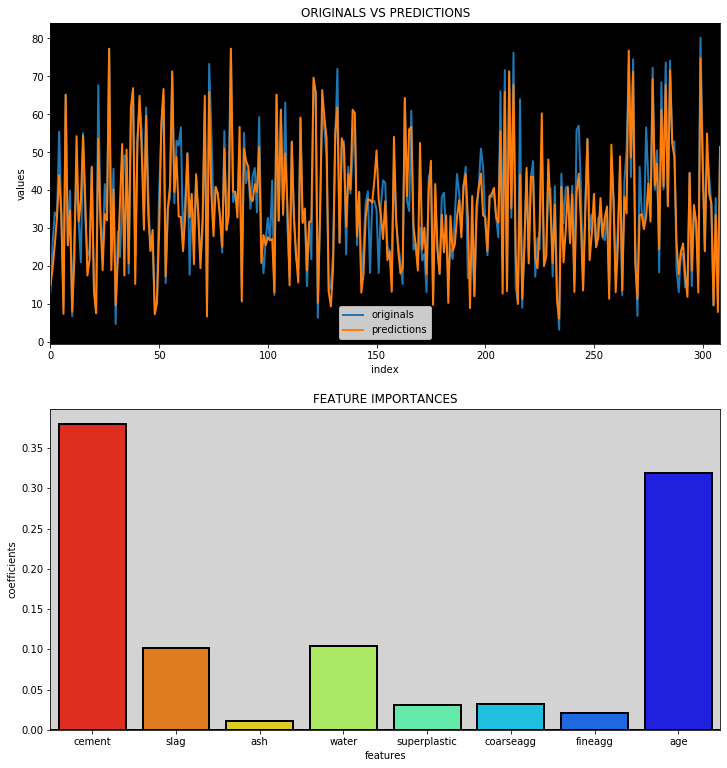

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,train_X,train_Y,test_X,test_Y,"feat")

# Random Forest Regressor

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.786867235087567
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -34.28028306123498
cv-std  : 15.409203320716282
cv-max  : -10.905617804012342
cv-min  : -75.13909528472222


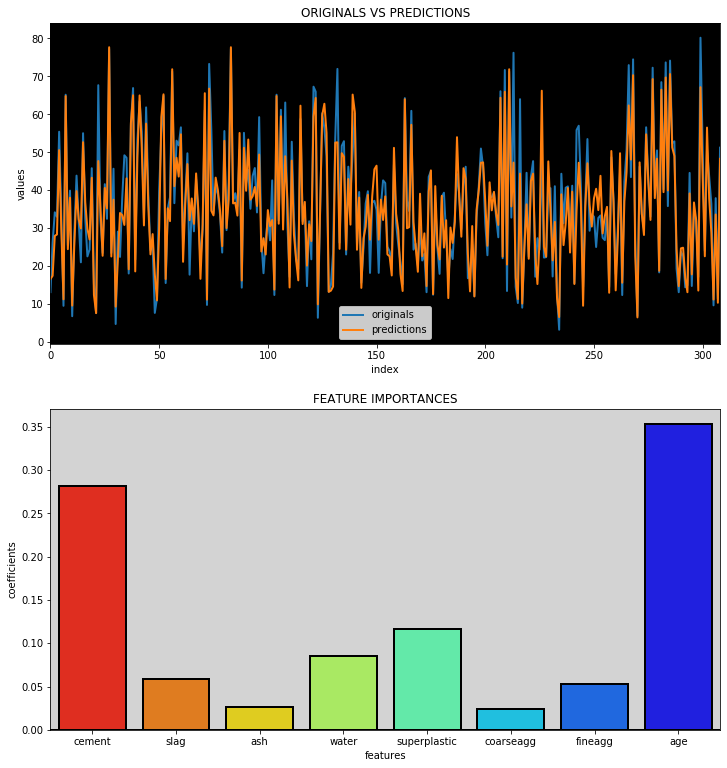

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model(rf,train_X,train_Y,test_X,test_Y,"feat")

# Gradient Boosting Regressor

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.162448938147234
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -28.358641794694783
cv-std  : 8.843289865494043
cv-max  : -12.615713750852851
cv-min  : -46.988594140

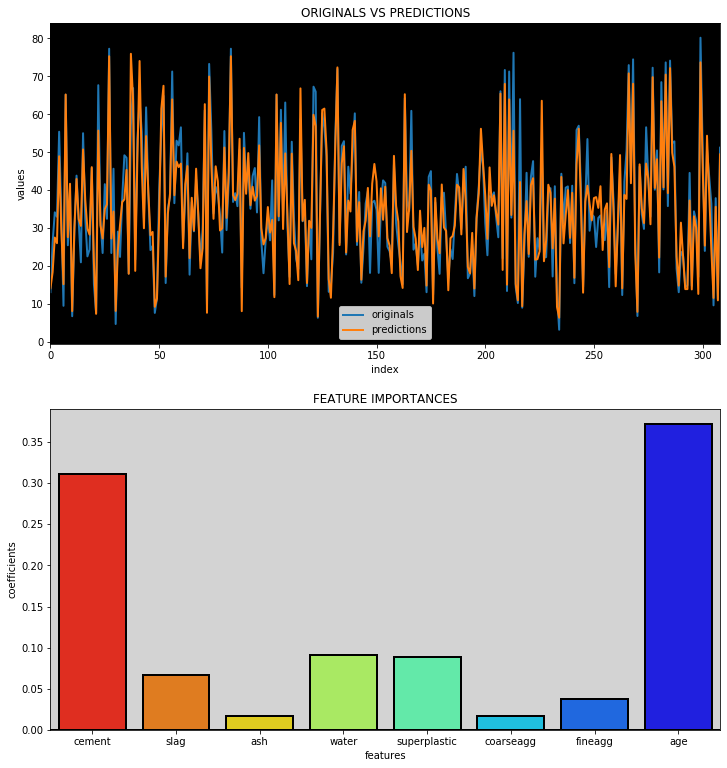

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
model(gbr,train_X,train_Y,test_X,test_Y,"feat")

# XGBoost Regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
***************************************************************************
[10:58:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
ROOT MEAN SQUARED ERROR : 5.097532502032393
***************************************************************************
[10:58:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarede

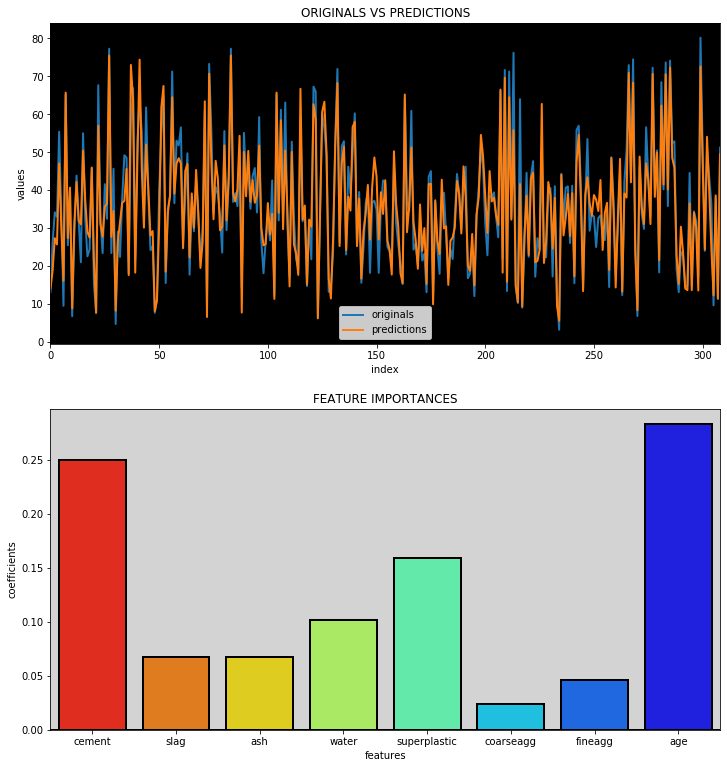

In [40]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr =XGBRegressor()
model(xgr,train_X,train_Y,test_X,test_Y,"feat")

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataframe[dataframe.columns[:-1]],
                                                    dataframe[[dataframe.columns[-1]]],
                                                    test_size = .2,
                                                    random_state = 1)

Rather than splitting training data further to validation set, we will perform cross validation in all our training models

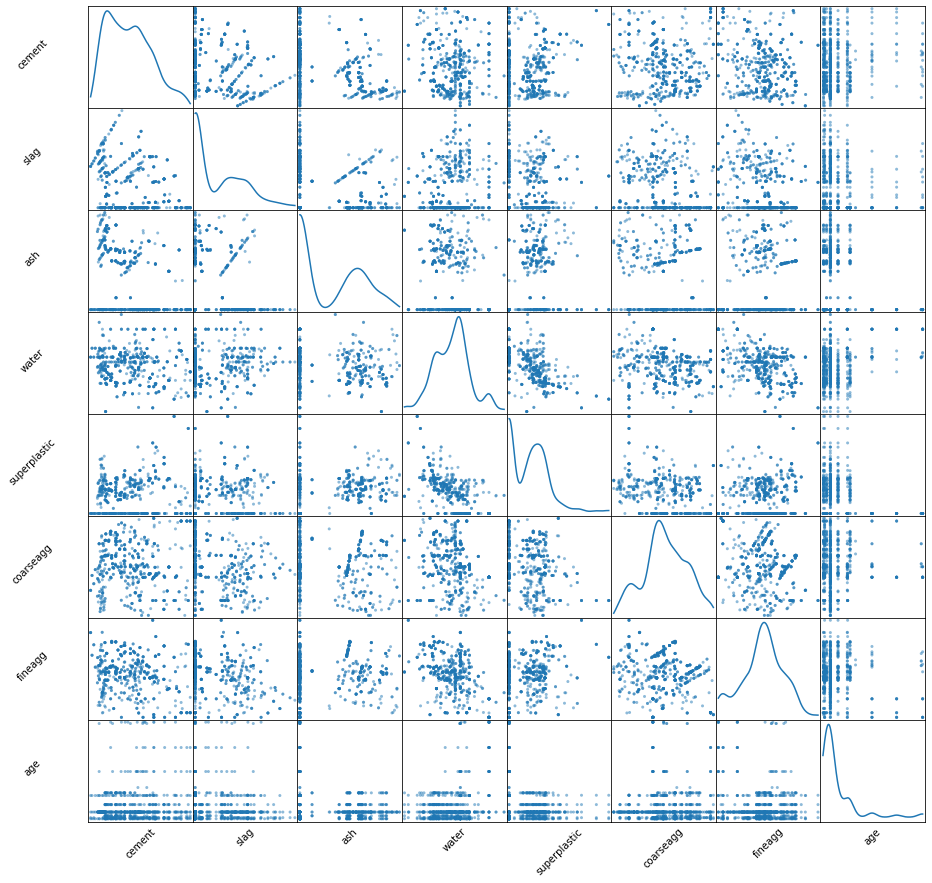

In [42]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
sm = scatter_matrix(x_train, figsize=(15,15), diagonal = 'kde')
#Changing label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(45) for s in sm.reshape(-1)]
#Changing offset for label
[s.get_yaxis().set_label_coords(-0.5,0.5) for s in sm.reshape(-1)]
#Hiding ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()


# No high correlation between any two features. Lets verify with Heatmap.



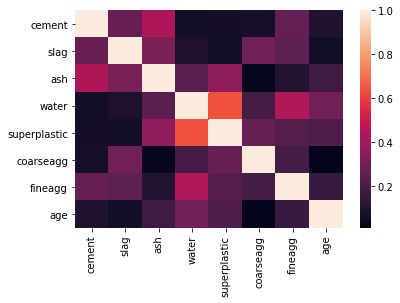

In [43]:
import seaborn as sns
sns.heatmap(x_train.corr().abs())
plt.show()

Little correlation of ~0.6 between Superplasticizer and Water (which is negative as evident from scatter matrix), but lets move forward as is.

In [44]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train),
                              columns = x_train.columns)
x_train_scaled.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0  1.038012 -0.838296 -0.883934  0.499298     -1.054123  -0.433488 -0.166207   
1  0.753573  1.357353 -0.883934 -0.770854      0.879130  -0.372869 -0.193576   
2 -0.654587 -0.838296  0.995414 -0.049070     -0.104162   1.083283  0.098772   
3  1.954953 -0.536249  1.017051  0.921120     -0.404150  -1.955419 -0.900187   
4  1.805248  0.541826 -0.883934 -0.011575      0.429149  -1.567198  0.126141   

        age  
0 -0.674794  
1 -0.287133  
2 -0.287133  
3 -0.674794  
4 -0.674794

In [45]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, x_train_scaled, y_train)

In [47]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


Model       RMSE  R Squared
0            Linear Regression  10.486209   0.599298
1             Ridge Regression  10.487354   0.599191
2             Lasso Regression  11.073431   0.553328
3        K Neighbors Regressor   9.335353   0.681681
4      Decision Tree Regressor   6.900440   0.825657
5      Random Forest Regressor   5.485759   0.887051
6  Gradient Boosting Regressor   5.314351   0.897048
7           Adaboost Regressor   7.706747   0.779335

In [48]:
#tuning this base model
GradientBoostingRegressor()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#tuning for number of trees
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':range(20,1001,10),
              'max_depth':[10], #range(5,16,2), 
              'min_samples_split':[100], #range(200,1001,200), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(x_train_scaled, y_train)
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

In [ ]:
#tuning the tree specific parameters
param_grid = {'n_estimators': [230],
              'max_depth': range(10,31,2), 
              'min_samples_split': range(50,501,10), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(x_train_scaled, y_train)
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

In [ ]:
#now increasing number of trees and decreasing learning rate proportionally
clf = GradientBoostingRegressor(random_state=1, max_depth=20, 
                                min_samples_split=170, n_estimators=230*2, 
                                learning_rate=0.2/2)
print("R Squared:",cross_val_score(clf, x_train_scaled, y_train, cv=cv, scoring='r2').mean())

Since score improved, the best model is GradientBoostingRegressor with learning_rate= 0.2/2, max_depth= 20, min_samples_split= 170, n_estimators= 230*2

In [ ]:
#applying this model on test data
x_test_scaled = pd.DataFrame(scaler.transform(x_test),
                             columns = x_test.columns)
clf = GradientBoostingRegressor(learning_rate=0.2/2, max_depth=20,
                                min_samples_split=170, n_estimators=230*2, 
                                random_state=1).fit(x_train_scaled, y_train)
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clf.predict(x_test_scaled))))
print("Test R^2: ", r2_score(y_test, clf.predict(x_test_scaled)))